<a href="https://colab.research.google.com/github/central209/CS4410/blob/main/brokaw_breastcancerdataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%matplotlib inline

In [ ]:
# LOADING THE DATA SET
# https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html

from sklearn.datasets import load_breast_cancer
breast_cancer = load_breast_cancer()

In [ ]:
# CHECKING SAMPLE AND TARGET SIZES
breast_cancer.target[::10]

array([0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [ ]:
breast_cancer.data.shape

(569, 30)

In [ ]:
breast_cancer.target.shape

(569,)

In [ ]:
# SPLITTING THE DATA FOR TESTING AND TRAINING
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(breast_cancer.data, breast_cancer.target, random_state=11)

In [ ]:
# TRAINING AND TESTING SET SIZES
X_train.shape

(426, 30)

In [ ]:
X_test.shape

(143, 30)

In [ ]:
# CREATING THE MODEL
from sklearn.naive_bayes import GaussianNB

In [ ]:
nb=GaussianNB()

In [ ]:
# TRAINING THE MODEL
nb.fit(X=X_train, y=y_train)

GaussianNB()

In [ ]:
# PREDICTING
predicted = nb.predict(X=X_test)
expected = y_test
predicted[:20]
expected[:20]
wrong = [(p, e) for (p, e) in zip(predicted, expected) if p != e]
wrong

[(1, 0), (1, 0), (0, 1), (1, 0), (1, 0), (1, 0), (1, 0)]

In [ ]:
# ESTIMATOR METHOD SCORE
print(f'{nb.score(X_test, y_test):.2%}')

95.10%


In [ ]:
# CONFUSION MATRIX
from sklearn.metrics import confusion_matrix

In [ ]:
confusion = confusion_matrix(y_true=expected, y_pred=predicted)

In [ ]:
confusion

array([[44,  6],
       [ 1, 92]])

In [ ]:
# CLASSIFICATION REPORT
from sklearn.metrics import classification_report

In [ ]:
breast_cancer.target_names

array(['malignant', 'benign'], dtype='<U9')

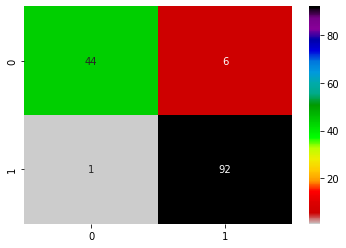

In [ ]:
# VISUALIZING THE CONFUSION MATRIX
import pandas as pd
import seaborn as sns

confusion_df = pd.DataFrame(confusion, index=range(2), columns=range(2))
axes = sns.heatmap(confusion_df, annot=True, cmap='nipy_spectral_r')

In [ ]:
# KFOLD CROSS VALIDATION
from sklearn.model_selection import KFold

In [ ]:
kfold = KFold(n_splits=10, shuffle=True, random_state=11)

In [ ]:
# USING THE KFOLD OBJECT WITH FUNCTION CROSS_VAL_SCORE
from sklearn.model_selection import cross_val_score

In [ ]:
scores = cross_val_score(estimator=nb, X=breast_cancer.data, y=breast_cancer.target, cv=kfold)

In [ ]:
scores

array([0.96491228, 0.9122807 , 0.94736842, 0.89473684, 0.96491228,
       0.94736842, 0.96491228, 0.89473684, 0.96491228, 0.92857143])

In [ ]:
print(f'Mean accuracy: {scores.mean():.2%}')

Mean accuracy: 93.85%


In [ ]:
print(f'Accuracy standard deviation: {scores.std():.2%}')

Accuracy standard deviation: 2.75%


In [ ]:
# RUNNING MULTIPLE MODELS TO FIND THE BEST ONE
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [ ]:
estimators = {
    'GaussianNB': nb,
    'KNeighborsClassifier': KNeighborsClassifier(), 
    'LogisticRegression': LogisticRegression(solver='lbfgs', multi_class='ovr', max_iter=10000),
    'SVC': SVC(gamma='scale')
    }

In [ ]:
for estimator_name, estimator_object in estimators.items():
     kfold = KFold(n_splits=10, shuffle=True, random_state=11)
     scores = cross_val_score(estimator=estimator_object, X=breast_cancer.data, y=breast_cancer.target, cv=kfold)
     print(f'{estimator_name:>20}: ' + f'mean accuracy={scores.mean():.2%}; ' + f'standard deviation={scores.std():.2%}')

          GaussianNB: mean accuracy=93.85%; standard deviation=2.75%
KNeighborsClassifier: mean accuracy=92.79%; standard deviation=2.01%
  LogisticRegression: mean accuracy=95.08%; standard deviation=3.02%
                 SVC: mean accuracy=91.92%; standard deviation=3.52%
